In [31]:
using VMEC
using BenchmarkTools
using ProfileVega
using Profile

include("../src/cobravmec.jl")
#vmec = VMEC.readVmecWout("wout_wista_15_beta_197.nc")
vmec = VMEC.readVmecWout("wout_wista_15_beta_0.nc")
# vmec = VMEC.readVmecWout("wout_ku4.nc")

#surfs = collect(0.01:0.01:0.99)
surfs = [0.5]

nwells = 10;
lscreen=false;

nθ = 80
nζ = 2;

θs = (0:nθ-1) .* (2π/nθ)
ζs = [2.0]
# ζs = (0:nζ-1) .* (2π/nζ/vmec.nfp)

function f_prof(N, interp)
    balloonGrowth, mercier, pres = 0,0,0;
    for ii = 1:N
        balloonGrowth, mercier, pres = cobravmec.cobra(vmec, surfs, nwells; θs, ζs, lscreen, interp, reltol=1e-3)
    end
    return balloonGrowth, mercier, pres
end

function opt_prof(N)
    balloonGrowthMax, balloonGrowthLoc = 0,0;
    for ii = 1:N
        balloonGrowthMax, balloonGrowthLoc = cobravmec.cobra_opt(vmec, surfs, nwells)
    end
    return balloonGrowthMax, balloonGrowthLoc
end

balloonGrowth_interp, mercier, pres = f_prof(1, true)
display(balloonGrowth_interp[1, :, :]);
balloonGrowth_not, mercier, pres = f_prof(1, false)
display(balloonGrowth_not[1, :, :]);
bgmax, bgloc = opt_prof(1)

wout file read successfully!
i_s = 1/1, ι = 1.0928544146093513


80×1 Matrix{Float64}:
 -0.2568688617008687
 -0.26582390567723746
 -0.2732151911007983
 -0.2788734030066387
 -0.2829912190990458
 -0.28600456122335033
 -0.28850530143695446
 -0.29106002941033227
 -0.2939387987268002
 -0.29678932645019895
 -0.2985518886313303
 -0.2982443365539237
 -0.295713949200258
  ⋮
 -0.2791581482890075
 -0.2759732950514736
 -0.2707471612104441
 -0.2634346102113504
 -0.25442271760879404
 -0.24470229624960038
 -0.23584420270043313
 -0.22970967993030936
 -0.22786965478776833
 -0.2308469184038319
 -0.23781238461404922
 -0.2470791270127644

wout file read successfully!
i_s = 1/1, ι = 1.0928544146093513


80×1 Matrix{Float64}:
 -0.25686872228236207
 -0.26582251203422386
 -0.27321540345525497
 -0.2788748578113421
 -0.282991397031241
 -0.28600372147297554
 -0.28850562166129723
 -0.29106027955405256
 -0.29393775812064377
 -0.2967884118711734
 -0.29855373293700915
 -0.29824543688298505
 -0.2957119868200507
  ⋮
 -0.2791578790876071
 -0.27597453694545554
 -0.27074758178234487
 -0.2634336408307819
 -0.2544227631938562
 -0.24470254226790084
 -0.2358430947105374
 -0.2297101220595076
 -0.22787103334448802
 -0.2308464900507294
 -0.23781157469206698
 -0.24707997496314582

80×1 Matrix{Float64}:
  1.3941850662835265e-7
  1.3936430136030076e-6
 -2.1235445668565944e-7
 -1.4548047033713374e-6
 -1.7793219520001458e-7
  8.397503747925583e-7
 -3.202243427646856e-7
 -2.5014372029286136e-7
  1.0406061564105507e-6
  9.145790255682407e-7
 -1.8443056788441936e-6
 -1.1003290613653682e-6
  1.9623802073320817e-6
  ⋮
  2.6920140039354834e-7
 -1.2418939819291985e-6
 -4.205719007499553e-7
  9.69380568482947e-7
 -4.558506216945091e-8
 -2.460183004537875e-7
  1.1079898957211398e-6
 -4.4212919825259434e-7
 -1.378556719694446e-6
  4.283531024884546e-7
  8.099219822310655e-7
 -8.479503814107225e-7

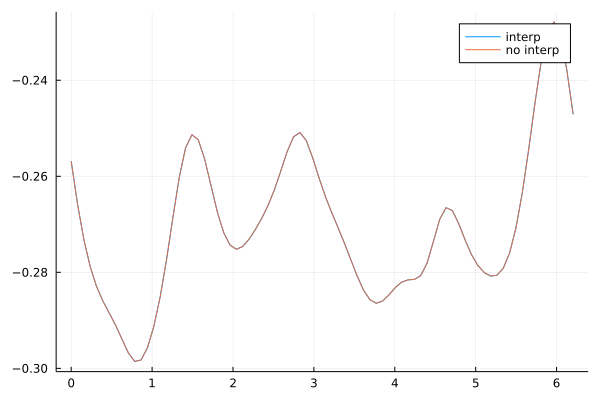

In [32]:
using LinearAlgebra
display(balloonGrowth_not[1,:,:] - balloonGrowth_interp[1,:,:])
norm(balloonGrowth_not[1,:,:] - balloonGrowth_interp[1,:,:])/norm(balloonGrowth_not)

using Plots
n = 1;
iota = 1.0928544146093513;
plot(θs, balloonGrowth_interp[1, :, n], label="interp")
plot!(θs, balloonGrowth_not[1, :, n], label="no interp")

In [2]:
Profile.clear()
interp = true;
# @profile f_prof(1, interp)
# @time f_prof(1, interp)
@profile opt_prof(1)
@time opt_prof(1)

i_s = 1/1
i_s = 1/1
 11.904634 seconds (12.35 M allocations: 11.580 GiB, 4.80% gc time)


([-0.1385946283876788 -0.1385946283876788 -0.1365231722558754 -0.13859448025758808;;; -0.1385946283876788 -0.1385946283876788 -0.1365231722558754 -0.13859448025102583;;; -0.1385946283876788 -0.13859462839424105 -0.1365231722558754 -0.13859448025102583;;; -0.1385946283876788 -0.1385946283876788 -0.1365231722558754 -0.13859448025758808], [1.323181458221378; 1.3486991153415548;;; 1.3231809324604955; 1.348698584423374;;; 2.448592753821454; 0.9262119191459187;;; 4.956260310531854; 0.21831113907068644;;;; 1.3231814536297188; 1.3486991107048256;;; 1.3231809325450141; 1.3486985845088788;;; 2.448592753821454; 0.9262119191459187;;; 4.956260310551432; 0.21831113909270305;;;; 1.3231814569309859; 1.348699114038654;;; 1.3231809332164803; 1.348698585186776;;; 2.4486038684849736; 0.9262226596125713;;; 4.956260310544879; 0.21831113908347755;;;; 1.3231815345823434; 1.3486991924500211;;; 1.3231809324914987; 1.348698584454577;;; 2.448592753904936; 0.9262119192392548;;; 4.956260306680315; 0.218311135175810

In [3]:
Profile.print(mincount=10)

Overhead ╎ [+additional indent] Count File:Line; Function
   19╎19    @Base/special/trig.jl:98; cos(x::Float64)
   20╎20    @Base/special/trig.jl:29; sin(x::Float64)
     ╎9289  @Base/task.jl:423; (::IJulia.var"#15#18")()
     ╎ 9289  ...ia/src/eventloop.jl:8; eventloop(socket::ZMQ.Socket)
     ╎  9289  @Base/essentials.jl:714; invokelatest
     ╎   9289  @Base/essentials.jl:716; #invokelatest#2
     ╎    9289  ...xecute_request.jl:67; execute_request(socket::ZMQ....
     ╎     9289  ...oftGlobalScope.jl:65; softscope_include_string(m:...
     ╎    ╎ 9289  @Base/loading.jl:1196; include_string(mapexpr::t...
    1╎    ╎  9289  @Base/boot.jl:373; eval
     ╎    ╎   9288  In[1]:37; opt_prof(N::Int64)
     ╎    ╎    9288  ...ec/src/cobra.jl:262; cobra_opt(vmec::Vmec{Flo...
     ╎    ╎     67    ...ec/src/cobra.jl:269; cobra_opt(vmec::Vmec{Flo...
     ╎    ╎    ╎ 30    ...c/VmecTypes.jl:526; VmecData(vmec::Vmec{Flo...
     ╎    ╎    ╎  29    @Base/array.jl:734; collect(itr::Base.Gene...
   

Interpolated    : 19.92 seconds,     13323/16586 (80%) snapshots in eigm
Not Interpolated: 43.825817 seconds, 13636/37234 (37%) snapshots in eigm

Interpolated + SymTridiagonal    : 2.27 seconds, 2580/3032 (85%) or snapshots in interpolation
Not Interpolated + SymTridiagonal: 24.1 seconds, basically whole time in get_matrix

In [52]:
2580/3032`

0.8509234828496042

In [ ]:
(3 + 2) + (3)
vs (3 + 2 + 1) + (3 + 1)